J: 1274949.068424263
a0_opt: 53.0736361846823
a1_opt: 0.004375568411647158
a2_opt: -0.014218283461807727


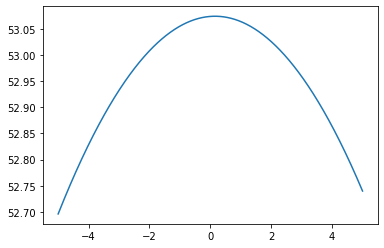

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#GERAR DADOS
M = 1000

x = np.linspace(-5,5,M) #gerando um vetor coluna de 1000 linhas com valores de uma distribuição uniforme entre -5 e 5
w = 3.162*np.random.randn(M,1) #gerando um vetor coluna de 1000 linhas com valores de uma distribuição normal de média 0 e variancia 10
y = 3 + 1.5*x + 2.3*x**2 + w

#CONCATENAR x1, x2 E ADICIONAR 1 PARA O PARAMETRO a0
X = np.c_[np.ones((1000,1)),x,x**2]

#SOLUÇÃO EM FORMA FECHADA
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
a0 = a_opt[0,0]
a1 = a_opt[1,0]
a2 = a_opt[2,0]
yhat = a0 + a1*x + a2*x**2 
Joptimum = (1/M)*np.sum(np.square((y - yhat)))

plt.plot(x,yhat)

#PASSO DE APRENDIZAGEM
#eta = 0.1

#NÚMERO DE ITERAÇÕES
#N_iterations = 1000

#INICIALIZAÇÃO DOS PARÂMETROS
#a = np.random.randn(3,1) #vetor coluna de parâmetros inicializados randomicamente
#J_hist = np.zeros(M + 1)

#GD EM BATELADA
#for iteration in range(N_iterations):
#    gradients = (-2/M)*X.T.dot(y-X.dot(a))
#    a = a - eta * gradients
#    y_hip = a[0] + a[1]*x + a[2]*x**2
#    J_hist[iteration+1] = (1/M)*np.sum (np.square(y - y_hip))
    
#PRINT DOS VALORES    
print('a0_opt: ' + str(a0))
print('a1_opt: ' + str(a1))
print('a2_opt: ' + str(a2))
    


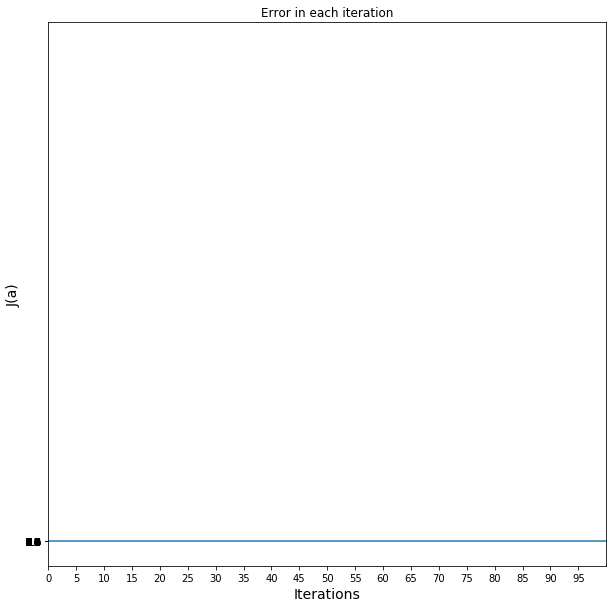

<Figure size 432x288 with 0 Axes>

In [18]:
#PLOTANDO O GRAFICO DO ERRO PARA CADA ITERAÇÃO
it = np.linspace(0,1000,M+1)
plt.figure(figsize=(10,10))
plt.plot(it, J_hist)

#ADICIONANDO LABELS E TÍTULO
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(a)', fontsize=14)
plt.title('Error in each iteration')

#ARRUMANDO OS INTERVALOS
plt.xlim(0, 100)
#plt.ylim(0, 10)
plt.xticks(np.arange(0, 100, step=5.0))
plt.yticks(np.arange(0, 10, step=0.2))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("erro_iteracao_gd_batelada_exercicio6.png", dpi=600)